## Zamboanga City House Price Prediction (Linear Regression)

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math, statistics

### Import dataset

In [207]:
df = pd.read_csv("../datasets/Real-Property-Appraissal-Building.csv")
df.head(10)

,Property,Barangay,Land Area,Floor Area,Classification,No. of storey,Structural Type,Roof Framing,Roofing,Exterior Walls,Flooring,Doors,Ceiling,Windows,Stairs,Wall Finish,Electrical Conduit,Toilet & Bowl,Plumbing,Market Value
0,Property 1,Canelar,665.0,354.08,Residential,2,2-A,Steel,GI,Cement Plaster,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
1,Property 2,Canelar,104.0,71.25,Residential,1,3-A,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Plain Cement Paint,Polyflex,Tiles,PVC,413000.0
2,Property 3,Canelar,406.0,210.30,Residential,1,NaN,Steel,GI,CHB,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,727910.0
3,Property 4,Canelar,240.0,81.00,Residential,1,2-A,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Cement Plaster,Polyflex,Tiles,PVC,610000.0
4,Property 5,Santa Maria,314.0,1314.00,Commercial,4,2-A,Steel,GI,CHB,Tiles,Flush,NaN,Alum. Casement,CONC.,Cement Plaster,PVC,Tiles,GI,7393688.0
5,Property 6,Santa Maria,300.0,98.83,Residential,2,2-A,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Glass,NaN,CHB,PVC,Tiles,PVC,560650.0
6,Property 7,Santa Maria,206.0,111.26,Residential,2,NaN,Steel,GI,CHB,Tiles,WOOD,Wood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
7,Property 8,Santa Maria,300.0,81.00,Residential,2,2-A,Wooden,GI,CHB,Tiles,PANEL,Plywood,Jalousie,NaN,Plain Cement Paint,Conduit Pipe,Tiles,PVC,400000.0
8,Property 9,Santa Maria,237.0,160.00,Residential,1,2-B,Wooden,GI,CHB,Concrete,ROLL UP,Plywood,Jalousie,WOODEN,CHB,Polyflex,CHB,PVC,440320.0
9,Property 10,Santa Maria,300.0,106.40,Residential,2,3-A,Wooden,GI,Cement Plaster,Concrete,Flush,Plywood,Wood,WOODEN,CHB,Open,CHB,PVC,505400.0


### Data Cleaning

In [208]:
df.columns

Index(['Property ', 'Barangay', 'Land Area', 'Floor Area', 'Classification',
       'No. of storey', 'Structural Type', 'Roof Framing', 'Roofing',
       'Exterior Walls', 'Flooring', 'Doors', 'Ceiling', 'Windows', 'Stairs',
       'Wall Finish', 'Electrical Conduit', 'Toilet & Bowl', 'Plumbing',
       'Market Value'],
      dtype='object')

In [209]:
df.isna().sum()

Property               0
Barangay               0
Land Area              5
Floor Area             0
Classification         0
No. of storey          0
Structural Type       33
Roof Framing           2
Roofing                0
Exterior Walls         2
Flooring               2
Doors                  5
Ceiling               26
Windows                7
Stairs                47
Wall Finish           15
Electrical Conduit    11
Toilet & Bowl         12
Plumbing              16
Market Value           0
dtype: int64

##### Removing unneeded data

In [210]:
df = df.drop('Property ', axis=1)
df.head()

,Barangay,Land Area,Floor Area,Classification,No. of storey,Structural Type,Roof Framing,Roofing,Exterior Walls,Flooring,Doors,Ceiling,Windows,Stairs,Wall Finish,Electrical Conduit,Toilet & Bowl,Plumbing,Market Value
0,Canelar,665.0,354.08,Residential,2,2-A,Steel,GI,Cement Plaster,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
1,Canelar,104.0,71.25,Residential,1,3-A,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Plain Cement Paint,Polyflex,Tiles,PVC,413000.0
2,Canelar,406.0,210.30,Residential,1,NaN,Steel,GI,CHB,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,727910.0
3,Canelar,240.0,81.00,Residential,1,2-A,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Cement Plaster,Polyflex,Tiles,PVC,610000.0
4,Santa Maria,314.0,1314.00,Commercial,4,2-A,Steel,GI,CHB,Tiles,Flush,NaN,Alum. Casement,CONC.,Cement Plaster,PVC,Tiles,GI,7393688.0


##### Renaming column names

In [211]:
df.columns = df.columns.str.lower()

In [212]:
df.columns

Index(['barangay', 'land area', 'floor area', 'classification',
       'no. of storey', 'structural type', 'roof framing', 'roofing',
       'exterior walls', 'flooring', 'doors', 'ceiling', 'windows', 'stairs',
       'wall finish', 'electrical conduit', 'toilet & bowl', 'plumbing',
       'market value'],
      dtype='object')

In [213]:
df = df.rename(columns={'barangay': 'brgy','land area': 'land_area',
        'floor area':'floor_area','classification':'classification','no. of storey':'storey',
        'structural type':'struct_type', 'roof framing':'roof_framing', 'roofing':'roofing',
        'exterior walls': 'ext_walls','flooring':'flooring','doors':'doors','ceiling':'ceiling',
        'windows':'windows','stairs':'stairs','wall finish':'wall_finish','electrical conduit':'elect_conduit',
        'toilet & bowl':'toilet','market value':'target_value'
})
df.columns

Index(['brgy', 'land_area', 'floor_area', 'classification', 'storey',
       'struct_type', 'roof_framing', 'roofing', 'ext_walls', 'flooring',
       'doors', 'ceiling', 'windows', 'stairs', 'wall_finish', 'elect_conduit',
       'toilet', 'plumbing', 'target_value'],
      dtype='object')

##### Barangay

In [214]:
df['brgy'] = df['brgy'].str.lower()
df['brgy'].head()

0        canelar
1        canelar
2        canelar
3        canelar
4    santa maria
Name: brgy, dtype: object

In [215]:
df['brgy'] = df['brgy'].astype("category")
df['brgy'].unique()

['canelar', 'santa maria', 'tetuan', 'san jose gusu', 'san jose cawa cawa', 'putik', 'divisoria']
Categories (7, object): ['canelar', 'divisoria', 'putik', 'san jose cawa cawa', 'san jose gusu', 'santa maria', 'tetuan']

In [216]:
df['brgy'] = df['brgy'].replace({'canelar':0, 'divisoria':1,
    'putik':2, 'san jose cawa cawa':3, 'san jose gusu':4, 'santa maria':5, 'tetuan':6
})

In [217]:
df['brgy'].unique()

array([0, 5, 6, 4, 3, 2, 1], dtype=int64)

##### Checking for null

In [218]:
df.isna().sum()

brgy               0
land_area          5
floor_area         0
classification     0
storey             0
struct_type       33
roof_framing       2
roofing            0
ext_walls          2
flooring           2
doors              5
ceiling           26
windows            7
stairs            47
wall_finish       15
elect_conduit     11
toilet            12
plumbing          16
target_value       0
dtype: int64

### Land Area

In [219]:
df.tail(14)

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
130,2,NaN,583.50,Residential,2,2-B,Steel,Long Span,CHB,Concrete,ROLL UP,Plywood,Glass,RC,Plain Cement Paint,Polyflex,TILES,GI,2600000.0
131,0,328.0,327.00,Commercial,2,2-B,Steel,GI,CHB,Concrete,ROLL UP,Plywood,Glass,RC,Cement Plaster,PVC,TILES,PVC,592790.0
132,0,263.0,180.00,Commercial,1,NaN,Lumber,GI,CHB,Wood,WOOD,Plywood,NaN,CC,Cement Plaster,PVC,NaN,NaN,91650.0
133,0,325.0,216.00,Commercial,2,2-A,Lumber,GI,CHB,Wood,PANEL,Plywood,Glass,RC,Cement Plaster,NaN,TILES,NaN,684000.0
134,0,446.0,232.00,Commercial,2,2-B,Steel,GI,CHB,Concrete,Flush,Plywood,Glass,WOODEN,Cement Plaster,Polyflex,TILES,GI,504000.0
135,0,2552.0,2223.00,Commercial,2,2-A,Steel,GI,CHB,Tiles,GLASS,Plywood,Glass,CONC.,Plain Cement Paint,Polyflex,TILES,GI,14796577.0
136,0,328.0,327.00,Commercial,2,2-B,Steel,GI,CHB,Concrete,ROLL UP,Plywood,Glass,RC,Cement Plaster,PVC,TILES,PVC,592790.0
137,1,10059.0,55.49,Commercial,1,2-A,Steel,Long Span,CHB,Tiles,GLASS,NaN,Glass,CC,CHB,PVC,TILES,PVC,487760.0
138,1,10059.0,451.40,Commercial,2,2-A,Steel,Long Span,CHB,Tiles,NaN,NaN,Glass,RC,CHB,PVC,TILES,PVC,3088810.0
139,1,10059.0,216.00,Commercial,1,2-A,Steel,Long Span,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,987120.0


In [220]:
df['land_area'] = df['land_area'].fillna(df['land_area'].median())

In [221]:
df.tail(14)

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
130,2,263.0,583.50,Residential,2,2-B,Steel,Long Span,CHB,Concrete,ROLL UP,Plywood,Glass,RC,Plain Cement Paint,Polyflex,TILES,GI,2600000.0
131,0,328.0,327.00,Commercial,2,2-B,Steel,GI,CHB,Concrete,ROLL UP,Plywood,Glass,RC,Cement Plaster,PVC,TILES,PVC,592790.0
132,0,263.0,180.00,Commercial,1,NaN,Lumber,GI,CHB,Wood,WOOD,Plywood,NaN,CC,Cement Plaster,PVC,NaN,NaN,91650.0
133,0,325.0,216.00,Commercial,2,2-A,Lumber,GI,CHB,Wood,PANEL,Plywood,Glass,RC,Cement Plaster,NaN,TILES,NaN,684000.0
134,0,446.0,232.00,Commercial,2,2-B,Steel,GI,CHB,Concrete,Flush,Plywood,Glass,WOODEN,Cement Plaster,Polyflex,TILES,GI,504000.0
135,0,2552.0,2223.00,Commercial,2,2-A,Steel,GI,CHB,Tiles,GLASS,Plywood,Glass,CONC.,Plain Cement Paint,Polyflex,TILES,GI,14796577.0
136,0,328.0,327.00,Commercial,2,2-B,Steel,GI,CHB,Concrete,ROLL UP,Plywood,Glass,RC,Cement Plaster,PVC,TILES,PVC,592790.0
137,1,10059.0,55.49,Commercial,1,2-A,Steel,Long Span,CHB,Tiles,GLASS,NaN,Glass,CC,CHB,PVC,TILES,PVC,487760.0
138,1,10059.0,451.40,Commercial,2,2-A,Steel,Long Span,CHB,Tiles,NaN,NaN,Glass,RC,CHB,PVC,TILES,PVC,3088810.0
139,1,10059.0,216.00,Commercial,1,2-A,Steel,Long Span,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,987120.0


In [222]:
df.isna().sum()

brgy               0
land_area          0
floor_area         0
classification     0
storey             0
struct_type       33
roof_framing       2
roofing            0
ext_walls          2
flooring           2
doors              5
ceiling           26
windows            7
stairs            47
wall_finish       15
elect_conduit     11
toilet            12
plumbing          16
target_value       0
dtype: int64

##### Classification

In [223]:
df['classification'].unique()

array(['Residential', 'Commercial'], dtype=object)

In [224]:
df['classification'] = df['classification'].replace({'Commercial': 0,'Residential':1})
df['classification'].unique()

array([1, 0], dtype=int64)

##### Structural Type

In [225]:
df['struct_type'].unique()

array(['2-A', '3-A', nan, '2-B', '3-B', '1-B', '1-C'], dtype=object)

In [226]:
df['struct_type']= df['struct_type'].replace({'1-A': 0,'1-B':1,'1-C':2,'2-A':3,'2-B':4,'3-A':5,'3-B':6,'4':7,'5-A':8,'5-B':9})

In [227]:
df['struct_type'].head()

0    3.0
1    5.0
2    NaN
3    3.0
4    3.0
Name: struct_type, dtype: float64

In [228]:
df.head()

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
0,0,665.0,354.08,1,2,3.0,Steel,GI,Cement Plaster,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
1,0,104.0,71.25,1,1,5.0,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Plain Cement Paint,Polyflex,Tiles,PVC,413000.0
2,0,406.0,210.30,1,1,NaN,Steel,GI,CHB,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,727910.0
3,0,240.0,81.00,1,1,3.0,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Cement Plaster,Polyflex,Tiles,PVC,610000.0
4,5,314.0,1314.00,0,4,3.0,Steel,GI,CHB,Tiles,Flush,NaN,Alum. Casement,CONC.,Cement Plaster,PVC,Tiles,GI,7393688.0


In [229]:
df['struct_type'] = df['struct_type'].fillna(statistics.mode(df['struct_type']))

In [230]:
df.head()

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
0,0,665.0,354.08,1,2,3.0,Steel,GI,Cement Plaster,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
1,0,104.0,71.25,1,1,5.0,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Plain Cement Paint,Polyflex,Tiles,PVC,413000.0
2,0,406.0,210.30,1,1,3.0,Steel,GI,CHB,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,727910.0
3,0,240.0,81.00,1,1,3.0,Steel,Long Span,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Cement Plaster,Polyflex,Tiles,PVC,610000.0
4,5,314.0,1314.00,0,4,3.0,Steel,GI,CHB,Tiles,Flush,NaN,Alum. Casement,CONC.,Cement Plaster,PVC,Tiles,GI,7393688.0


##### Roof Framing

In [231]:
df[df['roof_framing'].isna()]

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
51,6,2000.0,435.00,0,1,4.0,NaN,Concrete,Cement Plaster,Tiles,ROLL UP,NaN,Glass,NaN,Cement Plaster,PVC,Tiles,PVC,1776670.0
114,0,794.0,95.05,1,1,6.0,NaN,CORR./ GI,CHB,Concrete,WOOD,Plywood,Jalousie,WOODEN,NaN,Polyflex,CHB,GI,395000.0


In [232]:
df['roof_framing'] = df['roof_framing'].str.lower()
df['roof_framing'] = df['roof_framing'].astype("category")
df['roof_framing'].unique()

['steel', 'wooden', 'lumber', 'rc', NaN, 'c-purlins', 'open deck', 'gi/steel']
Categories (7, object): ['c-purlins', 'gi/steel', 'lumber', 'open deck', 'rc', 'steel', 'wooden']

In [233]:
df['roof_framing'] = df['roof_framing'].replace({'c-purlins':0, 'gi/steel':1, 'lumber':2, 'open deck':3, 'rc':4, 'steel':5, 'wooden':6
})

In [234]:
df['roof_framing'].isna().sum()

2

In [235]:
df['roof_framing'] = df['roof_framing'].fillna(statistics.mode(df['roof_framing']))

In [236]:
df.isna().sum()

brgy               0
land_area          0
floor_area         0
classification     0
storey             0
struct_type        0
roof_framing       0
roofing            0
ext_walls          2
flooring           2
doors              5
ceiling           26
windows            7
stairs            47
wall_finish       15
elect_conduit     11
toilet            12
plumbing          16
target_value       0
dtype: int64

##### Roofing

In [237]:
df['roofing'].unique()

array(['GI', 'Long Span', 'Concrete', 'S-Tile', 'Open Deck', 'CORR./ GI',
       'PLYWOOD', 'RC'], dtype=object)

In [238]:
df['roofing'] = df['roofing'].astype("category")
df['roofing'].unique()

['GI', 'Long Span', 'Concrete', 'S-Tile', 'Open Deck', 'CORR./ GI', 'PLYWOOD', 'RC']
Categories (8, object): ['CORR./ GI', 'Concrete', 'GI', 'Long Span', 'Open Deck', 'PLYWOOD', 'RC', 'S-Tile']

In [239]:
df['roofing'] = df['roofing'].replace({'CORR./ GI':0, 'Concrete':1, 'GI':2, 'Long Span':3, 'Open Deck':4, 'PLYWOOD':5, 'RC':6, 'S-Tile':7
})

In [240]:
df['roofing'].unique()
df.head()

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
0,0,665.0,354.08,1,2,3.0,5.0,2,Cement Plaster,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
1,0,104.0,71.25,1,1,5.0,5.0,3,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Plain Cement Paint,Polyflex,Tiles,PVC,413000.0
2,0,406.0,210.30,1,1,3.0,5.0,2,CHB,Tiles,WOOD,Plywood,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,727910.0
3,0,240.0,81.00,1,1,3.0,5.0,3,CHB,Tiles,WOOD,Plywood,Alum. Casement,CONC.,Cement Plaster,Polyflex,Tiles,PVC,610000.0
4,5,314.0,1314.00,0,4,3.0,5.0,2,CHB,Tiles,Flush,NaN,Alum. Casement,CONC.,Cement Plaster,PVC,Tiles,GI,7393688.0


##### Exterior Walls

In [241]:
df[df['ext_walls'].isna()]

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
139,1,10059.0,216.00,0,1,3.0,5.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,987120.0
140,1,10059.0,126.48,0,1,3.0,5.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428770.0


In [242]:
df['ext_walls'] = df['ext_walls'].str.lower()
df['ext_walls'] = df['ext_walls'].astype("category")
df['ext_walls'].unique()

['cement plaster', 'chb', 'wood', 'painted', 'adobe type', NaN]
Categories (5, object): ['adobe type', 'cement plaster', 'chb', 'painted', 'wood']

In [243]:
df['ext_walls'] = df['ext_walls'].replace({'adobe type':0, 'cement plaster':1, 'chb':2, 'painted':3, 'wood':4
})

In [244]:
df['ext_walls'].unique()

array([ 1.,  2.,  4.,  3.,  0., nan])

In [245]:
df['ext_walls'] = df['ext_walls'].fillna(statistics.mode(df['ext_walls']))
df['ext_walls'].head()

0    1.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: ext_walls, dtype: float64

In [246]:
df['ext_walls'].unique()

array([1., 2., 4., 3., 0.])

##### Flooring

In [247]:
df['flooring'] = df['flooring'].str.lower()
df['flooring'] = df['flooring'].astype("category")
df['flooring'].unique()

['tiles', 'concrete', 'wood', NaN]
Categories (3, object): ['concrete', 'tiles', 'wood']

In [248]:
df['flooring'] = df['flooring'].replace({'concrete':0, 'tiles':1, 'wood':2})

In [249]:
df['flooring'].unique()

array([ 1.,  0.,  2., nan])

In [250]:
df['flooring'] = df['flooring'].fillna(statistics.mode(df['flooring']))

In [251]:
df['flooring'].unique()

array([1., 0., 2.])

##### Doors

In [252]:
df['doors'] = df['doors'].str.lower()
df['doors'] = df['doors'].astype("category")
df['doors'].unique()

['wood', 'flush', 'panel', 'roll up', 'plywood', 'hcpd/wfpd', NaN, 'glass']
Categories (7, object): ['flush', 'glass', 'hcpd/wfpd', 'panel', 'plywood', 'roll up', 'wood']

In [253]:
df['doors'] = df['doors'].replace({'flush':0, 'glass':1, 'hcpd/wfpd':2, 'panel':3, 'plywood':4, 'roll up':5, 'wood':6
})

In [254]:
df['doors'].unique()

array([ 6.,  0.,  3.,  5.,  4.,  2., nan,  1.])

In [255]:
df['doors'] = df['doors'].fillna(statistics.mode(df['doors']))

##### Ceiling

In [256]:
df['ceiling'] = df['ceiling'].str.lower()
df['ceiling'] = df['ceiling'].astype("category")
df['ceiling'].unique()

['plywood', NaN, 'wood', 'unfinished', 'rc']
Categories (4, object): ['plywood', 'rc', 'unfinished', 'wood']

In [257]:
df['ceiling'] = df['ceiling'].replace({'plywood':0, 'rc':1, 'unfinished':2, 'wood':3})

In [258]:
df['ceiling'].unique()

array([ 0., nan,  3.,  2.,  1.])

In [259]:
df['ceiling'] = df['ceiling'].fillna(statistics.mode(df['ceiling']))

In [260]:
df.head()

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
0,0,665.0,354.08,1,2,3.0,5.0,2,1.0,1.0,6.0,0.0,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
1,0,104.0,71.25,1,1,5.0,5.0,3,2.0,1.0,6.0,0.0,Alum. Casement,CONC.,Plain Cement Paint,Polyflex,Tiles,PVC,413000.0
2,0,406.0,210.30,1,1,3.0,5.0,2,2.0,1.0,6.0,0.0,Glass,CONC.,Cement Plaster,PVC,Tiles,PVC,727910.0
3,0,240.0,81.00,1,1,3.0,5.0,3,2.0,1.0,6.0,0.0,Alum. Casement,CONC.,Cement Plaster,Polyflex,Tiles,PVC,610000.0
4,5,314.0,1314.00,0,4,3.0,5.0,2,2.0,1.0,0.0,0.0,Alum. Casement,CONC.,Cement Plaster,PVC,Tiles,GI,7393688.0


##### Windows

In [261]:
df['windows'] = df['windows'].str.lower()
df['windows'] = df['windows'].astype("category")
df['windows'].unique()

['glass', 'alum. casement', 'jalousie', 'wood', 'steel casement', 'scfw', 'wfpd', 'french window', NaN]
Categories (8, object): ['alum. casement', 'french window', 'glass', 'jalousie', 'scfw', 'steel casement', 'wfpd', 'wood']

In [262]:
df['windows'] = df['windows'].replace({'alum. casement':0, 'french window':1, 'glass':2, 'jalousie':3, 'scfw':4, 'steel casement':5, 'wfpd':6, 'wood':7
})

In [263]:
df['windows'].unique()

array([ 2.,  0.,  3.,  7.,  5.,  4.,  6.,  1., nan])

In [264]:
df['windows'] = df['windows'].fillna(statistics.mode(df['windows']))

In [265]:
df.isna().sum()

brgy               0
land_area          0
floor_area         0
classification     0
storey             0
struct_type        0
roof_framing       0
roofing            0
ext_walls          0
flooring           0
doors              0
ceiling            0
windows            0
stairs            47
wall_finish       15
elect_conduit     11
toilet            12
plumbing          16
target_value       0
dtype: int64

In [266]:
df.head()

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
0,0,665.0,354.08,1,2,3.0,5.0,2,1.0,1.0,6.0,0.0,2.0,CONC.,Cement Plaster,PVC,Tiles,PVC,1000000.0
1,0,104.0,71.25,1,1,5.0,5.0,3,2.0,1.0,6.0,0.0,0.0,CONC.,Plain Cement Paint,Polyflex,Tiles,PVC,413000.0
2,0,406.0,210.30,1,1,3.0,5.0,2,2.0,1.0,6.0,0.0,2.0,CONC.,Cement Plaster,PVC,Tiles,PVC,727910.0
3,0,240.0,81.00,1,1,3.0,5.0,3,2.0,1.0,6.0,0.0,0.0,CONC.,Cement Plaster,Polyflex,Tiles,PVC,610000.0
4,5,314.0,1314.00,0,4,3.0,5.0,2,2.0,1.0,0.0,0.0,0.0,CONC.,Cement Plaster,PVC,Tiles,GI,7393688.0


##### Wall Finish

In [267]:
df['wall_finish'] = df['wall_finish'].str.lower()
df['wall_finish'] = df['wall_finish'].astype("category")
df['wall_finish'].unique()

['cement plaster', 'plain cement paint', 'chb', NaN, 'adobe', 'wood', 'sand blast']
Categories (6, object): ['adobe', 'cement plaster', 'chb', 'plain cement paint', 'sand blast', 'wood']

In [268]:
df['wall_finish'] = df['wall_finish'].replace({'adobe':0, 'cement plaster':1, 'chb':2, 'plain cement paint':3, 'sand blast':4, 'wood':5
})

In [269]:
df['wall_finish'].unique()

array([ 1.,  3.,  2., nan,  0.,  5.,  4.])

In [270]:
df['wall_finish'] = df['wall_finish'].fillna(statistics.mode(df['wall_finish']))

In [271]:
df['wall_finish'].unique()

array([1., 3., 2., 0., 5., 4.])

##### Electrical Conduit

In [272]:
pd.set_option("display.max_column", None)

In [273]:
df['elect_conduit'] = df['elect_conduit'].str.lower()
df['elect_conduit'] = df['elect_conduit'].astype("category")
df['elect_conduit'].unique()

['pvc', 'polyflex', 'conduit pipe', 'open', 'upvc', ..., 'mouldflex', 'concealed', 'tube', 'painted', 'breakers']
Length: 12
Categories (11, object): ['breakers', 'concealed', 'conduit pipe', 'mouldflex', ..., 'polyflex', 'pvc', 'tube', 'upvc']

In [274]:
df['elect_conduit'] = df['elect_conduit'].replace({
    'breakers':0, 'concealed':1, 'conduit pipe':2, 'mouldflex':3, 'open':4,'painted':5,'pdx':6, 'polyflex':7, 'pvc':8, 'tube':9, 'upvc':10

})

In [275]:
df['elect_conduit'].unique()

array([ 8.,  7.,  2.,  4., 10., nan,  6.,  3.,  1.,  9.,  5.,  0.])

In [276]:
df['elect_conduit'] = df['elect_conduit'].fillna(statistics.mode(df['elect_conduit']))

In [277]:
df.head()

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
0,0,665.0,354.08,1,2,3.0,5.0,2,1.0,1.0,6.0,0.0,2.0,CONC.,1.0,8.0,Tiles,PVC,1000000.0
1,0,104.0,71.25,1,1,5.0,5.0,3,2.0,1.0,6.0,0.0,0.0,CONC.,3.0,7.0,Tiles,PVC,413000.0
2,0,406.0,210.30,1,1,3.0,5.0,2,2.0,1.0,6.0,0.0,2.0,CONC.,1.0,8.0,Tiles,PVC,727910.0
3,0,240.0,81.00,1,1,3.0,5.0,3,2.0,1.0,6.0,0.0,0.0,CONC.,1.0,7.0,Tiles,PVC,610000.0
4,5,314.0,1314.00,0,4,3.0,5.0,2,2.0,1.0,0.0,0.0,0.0,CONC.,1.0,8.0,Tiles,GI,7393688.0


##### Toilet and Bowl

In [278]:
df['toilet'] = df['toilet'].str.lower()
df['toilet'] = df['toilet'].astype("category")
df['toilet'].unique()

['tiles', 'chb', NaN, 'wood', 'tiles ']
Categories (4, object): ['chb', 'tiles', 'tiles ', 'wood']

In [279]:
df['toilet'] = df['toilet'].replace({'chb':0, 'tiles':1, 'tiles ':1, 'wood':2})

In [280]:
df['toilet'].unique()

array([ 1.,  0., nan,  2.])

In [281]:
df['toilet'] = df['toilet'].fillna(statistics.mode(df['toilet']))

##### Plumbing

In [282]:
df['plumbing'] = df['plumbing'].str.lower()
df['plumbing'] = df['plumbing'].astype("category")
df['plumbing'].unique()

['pvc', 'gi', NaN, 'open']
Categories (3, object): ['gi', 'open', 'pvc']

In [283]:
df['plumbing'] = df['plumbing'].replace({'gi':0, 'open':1, 'pvc':2})

In [284]:
df['plumbing'].unique()

array([ 2.,  0., nan,  1.])

In [285]:
df['plumbing'] = df['plumbing'].fillna(statistics.mode(df['plumbing']))

In [286]:
df.head()

,brgy,land_area,floor_area,classification,storey,struct_type,roof_framing,roofing,ext_walls,flooring,doors,ceiling,windows,stairs,wall_finish,elect_conduit,toilet,plumbing,target_value
0,0,665.0,354.08,1,2,3.0,5.0,2,1.0,1.0,6.0,0.0,2.0,CONC.,1.0,8.0,1.0,2.0,1000000.0
1,0,104.0,71.25,1,1,5.0,5.0,3,2.0,1.0,6.0,0.0,0.0,CONC.,3.0,7.0,1.0,2.0,413000.0
2,0,406.0,210.30,1,1,3.0,5.0,2,2.0,1.0,6.0,0.0,2.0,CONC.,1.0,8.0,1.0,2.0,727910.0
3,0,240.0,81.00,1,1,3.0,5.0,3,2.0,1.0,6.0,0.0,0.0,CONC.,1.0,7.0,1.0,2.0,610000.0
4,5,314.0,1314.00,0,4,3.0,5.0,2,2.0,1.0,0.0,0.0,0.0,CONC.,1.0,8.0,1.0,0.0,7393688.0


In [287]:
df.isna().sum()

brgy               0
land_area          0
floor_area         0
classification     0
storey             0
struct_type        0
roof_framing       0
roofing            0
ext_walls          0
flooring           0
doors              0
ceiling            0
windows            0
stairs            47
wall_finish        0
elect_conduit      0
toilet             0
plumbing           0
target_value       0
dtype: int64

In [288]:
df = df.drop('struct_type', axis=1)
df = df.drop('stairs', axis=1)

##### End of Cleaning

### Pre-Processing

In [289]:
X = df[['brgy', 'land_area', 'floor_area', 'classification', 'storey',
       'roof_framing', 'roofing', 'ext_walls', 'flooring', 'doors', 'ceiling',
       'windows', 'wall_finish', 'elect_conduit', 'toilet', 'plumbing']]
       
y = df.target_value

In [290]:
lin_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=18)

lin_reg.fit(X_train,y_train)

print(f'model score on training data: {lin_reg.score(X_train, y_train)}')
print(f'model score on testing data: {lin_reg.score(X_test, y_test)}')

model score on training data: 0.9520084362715892
model score on testing data: 0.8229617215330278


In [348]:
from sklearn import ensemble

grbr = ensemble.GradientBoostingRegressor(n_estimators=300, max_depth = 4, min_samples_split = 2, learning_rate = 0.3, loss ='ls')

In [349]:
grbr.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.3, loss='ls', max_depth=4,
                          n_estimators=300)

In [350]:
grbr.score(X_test, y_test)

0.8097153818004169

In [294]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=16, test_size=0.1, random_state=18)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 0.82296172, -0.39801575,  0.68191363, -0.43800184,  0.92273929,
        0.66539437,  0.91889914,  0.62183985,  0.68403776,  0.75835003,
        0.28277565,  0.49701141, -0.81750917,  0.60886084,  0.83505573,
        0.31071338])

In [295]:
from sklearn import metrics
from sklearn.metrics import r2_score
  

# calculated values
y_pred = lin_reg.predict(X_test)  # Y_pred = Y'
  
# Result of MAE
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

# Result of R^2
print("R Squared:",r2_score(y_test, y_pred))


Mean Absolute Error: 164550.66571711932
Mean Squared Error: 33942314071.489567
Root Mean Squared Error: 405.64845089944487
R Squared: 0.8229617215330278


### Residuals Plot

In [296]:
%matplotlib inline
import seaborn as sns

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


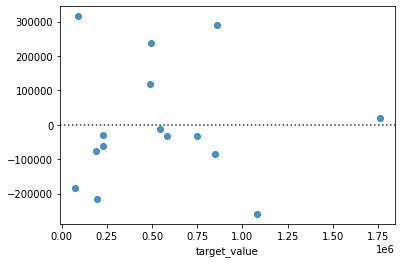

In [297]:
g = sns.residplot(y_test, y_pred, data=df)

In [298]:
### Ridge Reression

In [299]:
from sklearn.linear_model import Ridge
rid_reg = Ridge()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=18)

rid_reg.fit(X_train,y_train)
pred = rid_reg.predict(X_test)


print(f'model score on training data: {rid_reg.score(X_train, y_train)}')
print(f'model score on testing data: {rid_reg.score(X_test, y_test)}')

model score on training data: 0.95189793284481
model score on testing data: 0.808268694217


In [300]:
from sklearn import metrics
from sklearn.metrics import r2_score
  

# calculated values
y_pred = rid_reg.predict(X_test)  # Y_pred = Y'
  
# Result of MAE
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

# Result of R^2
print("R Squared:",r2_score(y_test, y_pred))


Mean Absolute Error: 169393.23334424788
Mean Squared Error: 36759305696.917244
Root Mean Squared Error: 411.5740921684064
R Squared: 0.808268694217


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


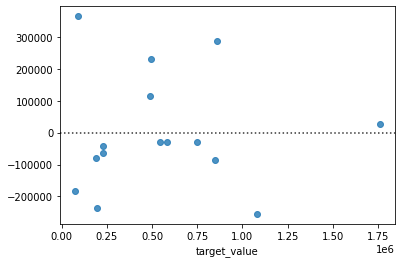

In [301]:
g = sns.residplot(y_test, y_pred, data=df)

### Gradient Boosting

In [302]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

xgbr = XGBRegressor(verbosity=0) 

In [303]:
from sklearn.metrics import mean_squared_error, r2_score

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

# Result of MAE
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

# Result of R^2
print("R Squared:",r2_score(y_test, y_pred))

Mean Absolute Error: 120745.61770833333
Mean Squared Error: 25211587219.354637
Root Mean Squared Error: 347.48470140185066
R Squared: 0.9339715473733121


In [304]:
df.columns

Index(['brgy', 'land_area', 'floor_area', 'classification', 'storey',
       'roof_framing', 'roofing', 'ext_walls', 'flooring', 'doors', 'ceiling',
       'windows', 'wall_finish', 'elect_conduit', 'toilet', 'plumbing',
       'target_value'],
      dtype='object')

In [305]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

params = {
    "n_estimators": 100,
    "max_depth": 3,
    "min_samples_split": 2,
    "learning_rate": 0.3,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
# Result of MAE
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

# Result of R^2
print("R Squared:",r2_score(y_test, y_pred))

Mean Absolute Error: 125962.16196684979
Mean Squared Error: 28882693129.75154
Root Mean Squared Error: 354.91148469280307
R Squared: 0.8280038505831979


In [306]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
88,20000.0,4.106563e+05
126,462520.0,6.871980e+05
56,226500.0,1.921675e+05
103,230000.0,1.779357e+05
121,374960.0,2.746886e+05
106,600000.0,6.031273e+05
80,1000000.0,1.305541e+06
13,423000.0,4.799133e+05
76,613720.0,5.737587e+05
132,91650.0,2.853408e+05


In [307]:
y_test

88       20000.0
126     462520.0
56      226500.0
103     230000.0
121     374960.0
106     600000.0
80     1000000.0
13      423000.0
76      613720.0
132      91650.0
131     592790.0
47     1700000.0
67      857560.0
133     684000.0
21      200000.0
Name: target_value, dtype: float64

In [308]:
y_pred=np.rint(y_pred)
y_pred

array([ 410656.,  687198.,  192168.,  177936.,  274689.,  603127.,
       1305541.,  479913.,  573759.,  285341.,  601646., 1791169.,
        789004.,  433860.,  269475.])

In [309]:
y_test

88       20000.0
126     462520.0
56      226500.0
103     230000.0
121     374960.0
106     600000.0
80     1000000.0
13      423000.0
76      613720.0
132      91650.0
131     592790.0
47     1700000.0
67      857560.0
133     684000.0
21      200000.0
Name: target_value, dtype: float64

In [310]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [311]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
88,20000.0,410656.0
126,462520.0,687198.0
56,226500.0,192168.0
103,230000.0,177936.0
121,374960.0,274689.0
106,600000.0,603127.0
80,1000000.0,1305541.0
13,423000.0,479913.0
76,613720.0,573759.0
132,91650.0,285341.0


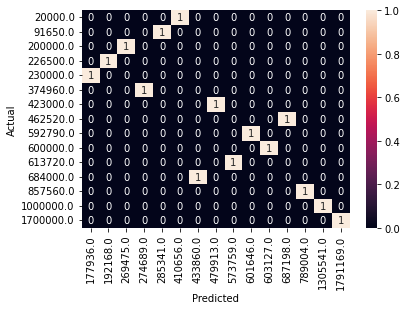

In [312]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


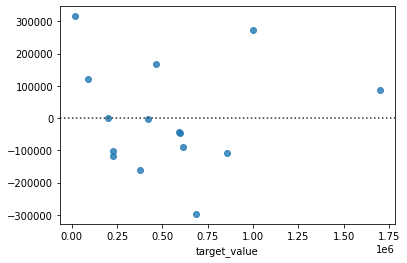

In [313]:
g = sns.residplot(y_test, y_pred, data=df)

### Export pickle file

In [314]:
df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [315]:
import pickle

pickle.dump(reg, open('model.pkl','wb'))

In [316]:
# model = pickle.load(open('model.pkl','rb'))

In [317]:
"""import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))"""

'import json\n\ncolumns = {\n    \'data_columns\' : [col.lower() for col in X.columns]\n}\nwith open("columns.json","w") as f:\n    f.write(json.dumps(columns))'

In [318]:
# df.to_csv (r'D:\System\broker\datasets\export_dataframe.csv', index = False, header=True)

# print (df)